# Tutorial: Fitting and prediction

In this tutorial, we will practice implementing linear regression models in R.

## Goals:
* Learn to use the `lm` function
* Learn to use the `predict` function

This lab draws from the content of Chapter 2 and practice sets at the end of Chapter 3 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r."

--- 
# Simple linear regression with a single predictor

First, we will look at a simple case, where $X$ has only one predictor (i.e., p = 1). For these first examples we will be using the [MASS](https://cran.r-project.org/web/packages/MASS/MASS.pdf) library. 

In [ ]:
# Load the namespace for these packages and attach them to the search list 
library(MASS)
library(ggplot2)

Let's start with some simple linear regression models from the _MASS_ library. In particular, let's use the `Cars93` data set, which records various characteristics for randomly selected 1993 passenger car models. We will want to see how other factors actually predict the price of these cars. 

If you want to visualize the data set first, use the `fix()` function like so. (Note: this won't work in Colab or the Jupyter notebook environment, but will work in RStudio).

In [ ]:
# fix(Cars93)

Let's take a look at all the variables in `Cars93`

In [ ]:
names(Cars93)

[1] "Manufacturer"       "Model"              "Type"              
 [4] "Min.Price"          "Price"              "Max.Price"         
 [7] "MPG.city"           "MPG.highway"        "AirBags"           
[10] "DriveTrain"         "Cylinders"          "EngineSize"        
[13] "Horsepower"         "RPM"                "Rev.per.mile"      
[16] "Man.trans.avail"    "Fuel.tank.capacity" "Passengers"        
[19] "Length"             "Wheelbase"          "Width"             
[22] "Turn.circle"        "Rear.seat.room"     "Luggage.room"      
[25] "Weight"             "Origin"             "Make"

You can also also take a look at the description for this data set using the `help()` function or `?` shortcut. This will create a separate window that will give you the relevant information about any data set, libarary, or function in r.

In [ ]:
help(Cars93)
?Cars93

## Model fitting

Now we want to use the built-in `lm` function in r. We already went over this a little bit in the recitation tutorial about model objects. But let's go a bit more in-depth.

First, let's do some basic analysis. 

In [ ]:
# To get more information on the lm function execute this cell
help(lm)

Let's use the built-in `lm` function to look at the relationship between the width of cars (`Width`) and their weight (`Weight`). 
<br>
**Note:** you can use `ggplot2` or the built-in `plot`function for data exploration

As an initial step, we can check whether our dependent variable (`Weight`) is normally distributed, using a [Q-Q plot](https://data.library.virginia.edu/understanding-q-q-plots/#:~:text=A%20Q%2DQ%20plot%20is%20a,truly%20come%20from%20Normal%20distributions.). 

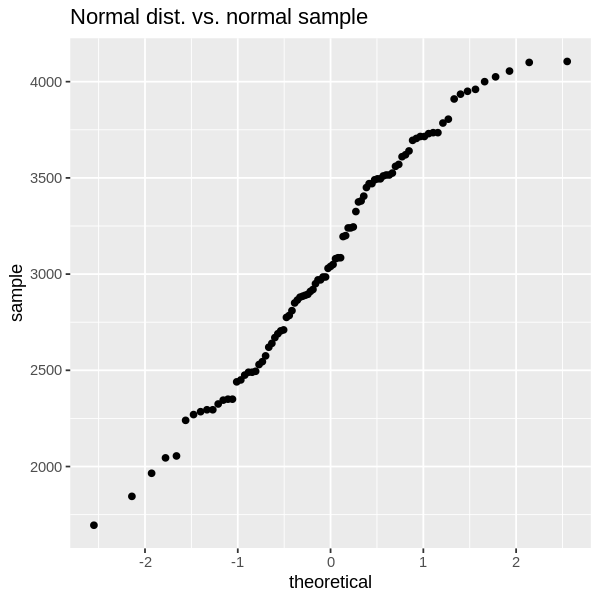

In [ ]:
options(repr.plot.width=5, repr.plot.height=5) # plot size 
ggplot(Cars93, aes(sample=Weight)) + geom_point(stat = "qq") + ggtitle("Normal dist. vs. normal sample")

Since this is a rougly a straight line, we can safely assume that the `Weight` variable is normally distributed. 

We can also take a preliminary look at scatterplots across all pairs of our variables. We can simply do this by using the `pairs` function.

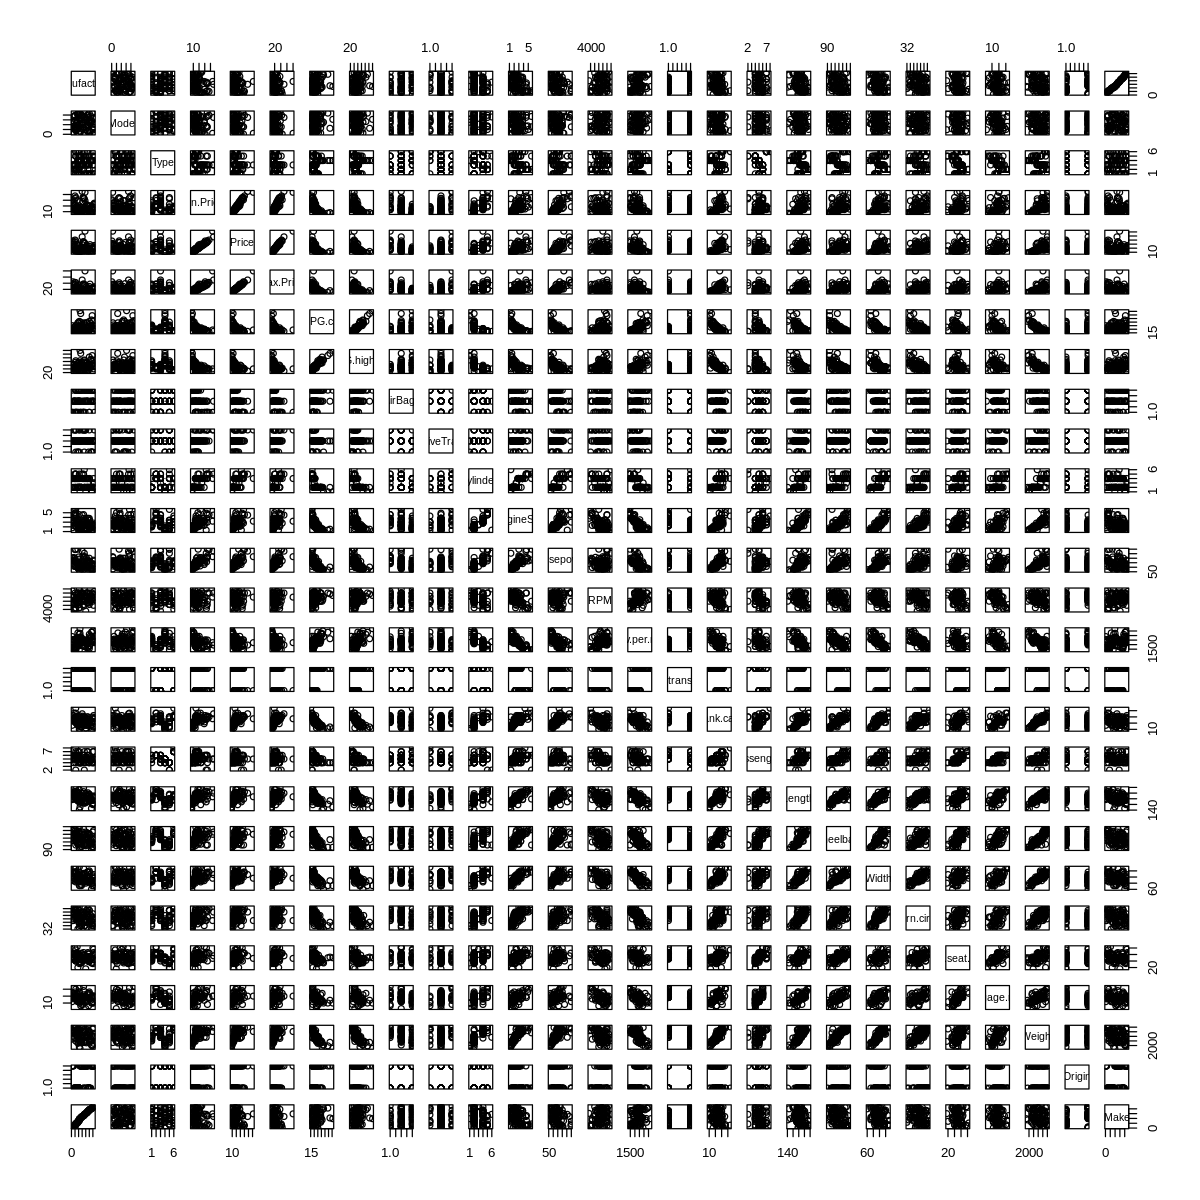

In [ ]:
# install.packages("repr") # uncomment to install repr library
library(repr)
options(repr.plot.width=10, repr.plot.height=10) # plot size reset
pairs(Cars93)

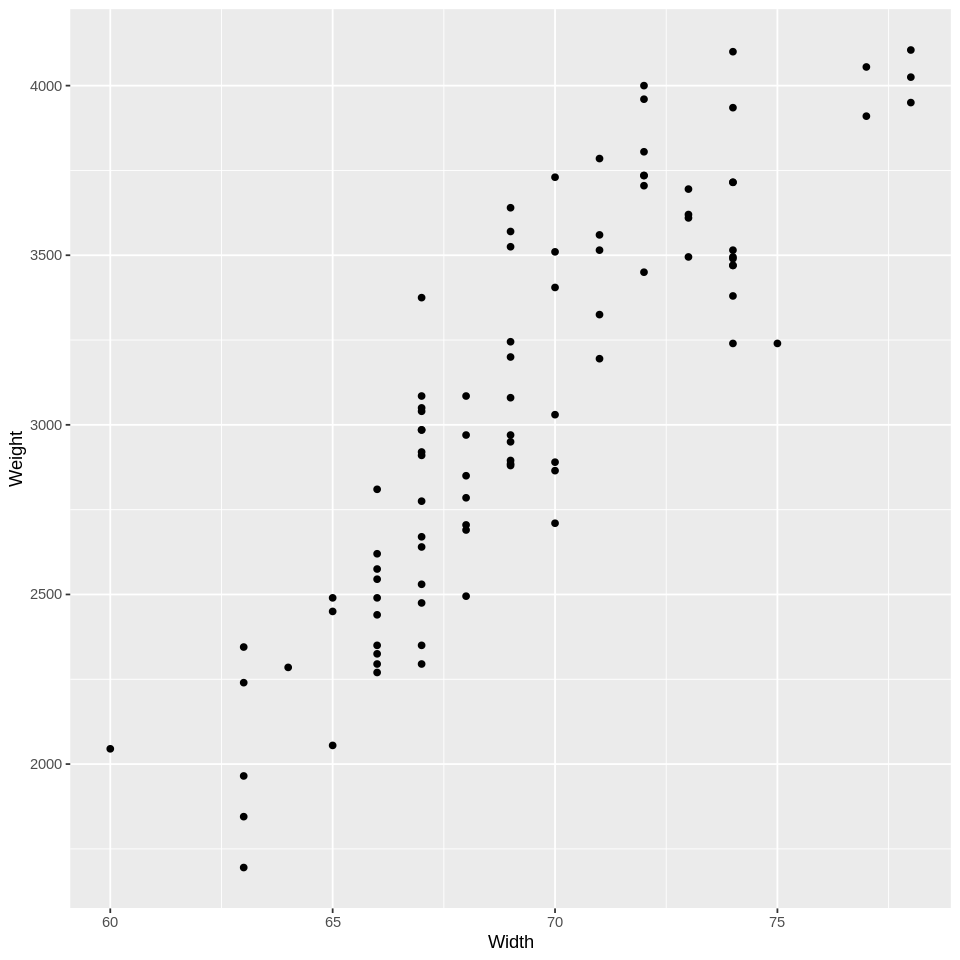

In [ ]:
# Plot the joint distribution
options(repr.plot.width=8, repr.plot.height=8)
ggplot(aes(Width, Weight), data=Cars93) + 
geom_point() + 
xlab('Width') + 
ylab('Weight')

Now let's build a model object using `lm` that captures this simple relationship. Remember that the output from the `lm` function is an object that contains all the information about the model that you trained.

In [ ]:
# Let's try a simple linear model
lm.fit = lm(Weight~Length, data=Cars93)

# In order to see the results, use the summary function
summary(lm.fit)


Call:
lm(formula = Weight ~ Length, data = Cars93)

Residuals:
    Min      1Q  Median      3Q     Max 
-543.68 -227.54  -87.96  176.89  899.32 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2894.297    460.376  -6.287  1.1e-08 ***
Length         32.571      2.505  13.002  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 350.9 on 91 degrees of freedom
Multiple R-squared:  0.6501,	Adjusted R-squared:  0.6462 
F-statistic: 169.1 on 1 and 91 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



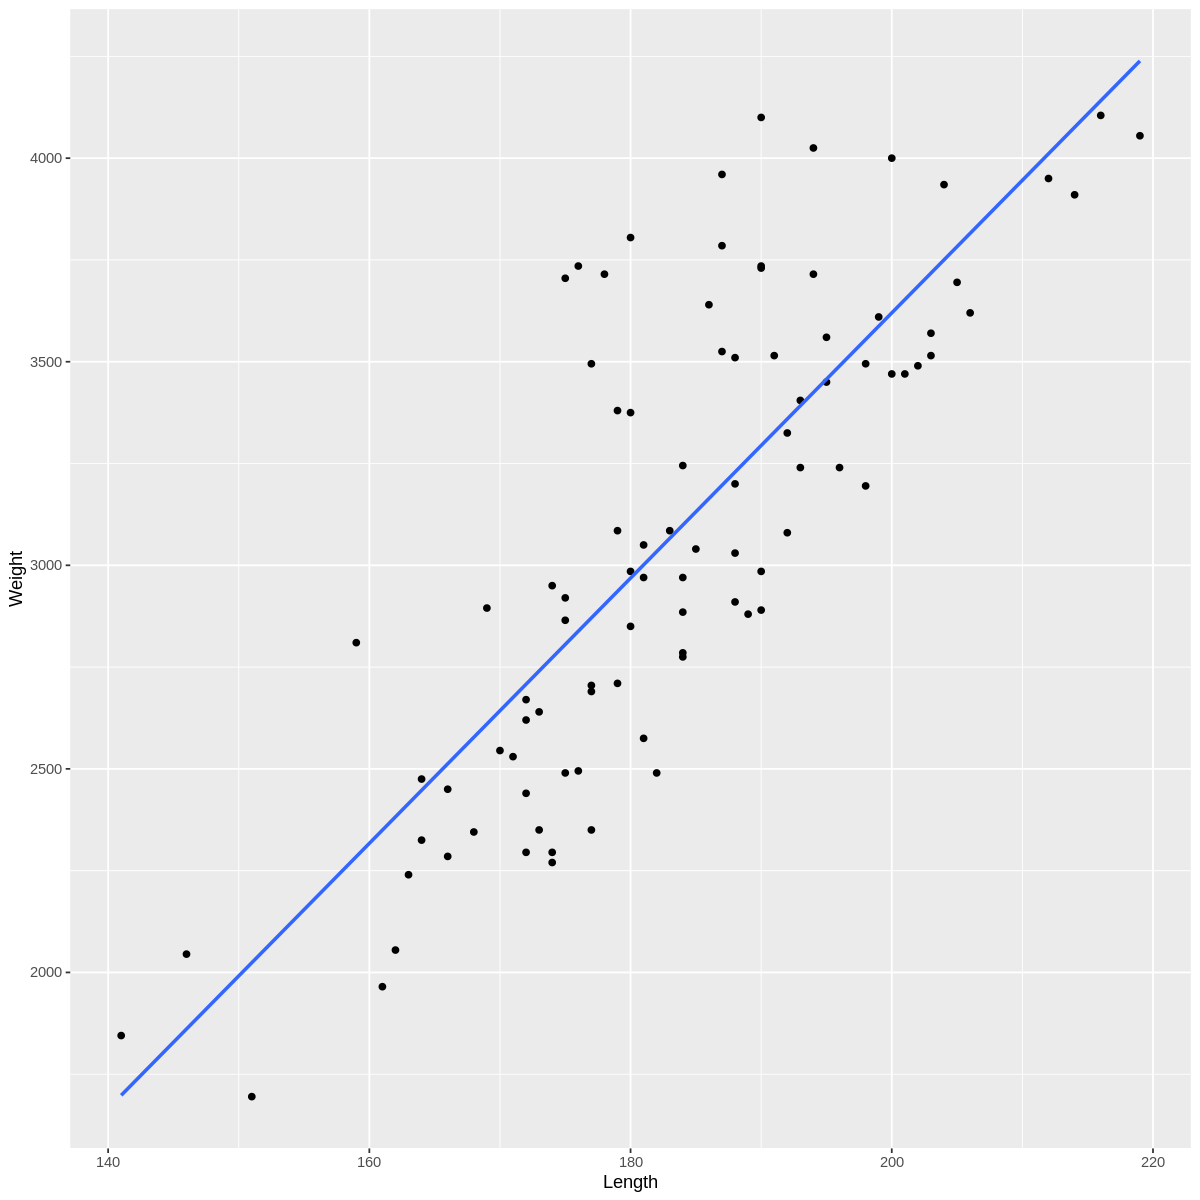

In [ ]:
# you can also add the fit model in your ggplot to show both the line fitted and uncertainty around the fitted line
ggplot(aes(Length, Weight), data=Cars93) + 
  geom_point() + 
  geom_smooth(method = 'lm',se=FALSE) # fits line without standard error shading - try deleting "se=FALSE"

## Inference

The coefficients table tells us that the effect of `Width` on `Weight` is statistically significant (the three stars next to each coefficient row in the output table). We can use the `coef` function to extract the estimated regression coefficients.

In [ ]:
# Just grab the regression coefficients themselves
coef(lm.fit)[1]

coef(lm.fit)[2]

(Intercept) 
  -2894.297

Length 
32.57129

These are the estimated $\hat{\beta_0}$ and $\hat{\beta_1}$ values. We can also easily estimate the confidence intervals on the coefficients from the model using the `confint` function.

In [ ]:
# In order to estimate the confidence interval on the regression coefficients we will use confit
# help("confint") # uncomment to see information on this function
print(confint(lm.fit))

                  2.5 %      97.5 %
(Intercept) -3808.77815 -1979.81606
Length         27.59531    37.54727


Does the 95% confidence interval for the `Width` coefficient contain zero? 

Do you accept or reject the null hypothesis that the width of a car associates with its weight?

## Prediction

Along with inferring the effect of `Width` on `Weight`, we can also use the model that we just trained to *predict* a car's weight for specific weight values. For this we will use the `predict` function.

In [ ]:
# We want to predict car weight at specific lstat levels
# help("predict") # Uncomment to see how the function works

# Here we will predict what the weight would be if the width for the car is 165, 180, or 195 inches.

length_input_values = data.frame(Length=c(165,180,195)) #specific SES values that you want a prediction for 
prediction_table = data.frame(predict(lm.fit, length_input_values, interval = 'confidence'))  #calling the predict function 

pred_input_table = cbind(length_input_values, prediction_table) #bind the input and prediction dataframes by column 

colnames(pred_input_table) = c('length_input','predicted fit','lower_CI_bound', 'upper_CI_bound') #use informative column names 
round(pred_input_table,2) #display rounded values

,length_input,predicted fit,lower_CI_bound,upper_CI_bound
,<dbl>,<dbl>,<dbl>,<dbl>
1,165,2479.97,2364.08,2595.85
2,180,2968.54,2894.53,3042.54
3,195,3457.10,3364.00,3550.21


The predicted `Weight` values for each of the three `Length` values are returned, along with the lower and upper bounds of the 95% confidence interval of those predictions (i.e., we are 95% confident that the real value rests between those two bounds). For example, when `length`=180, we are 95% confident that the car's weight will be between 2894.53 lbs and 3042.54 lbs.

## Plotting

So far in this lab we have:

1. Estimated a model.
2. Inferred the estimated effect ($\hat{\beta}$) of a predictor (`Width`) on a response variable (`Weight`).
3. Generated predictions using this model.

Now let's learn some tools for visualizing the effects.

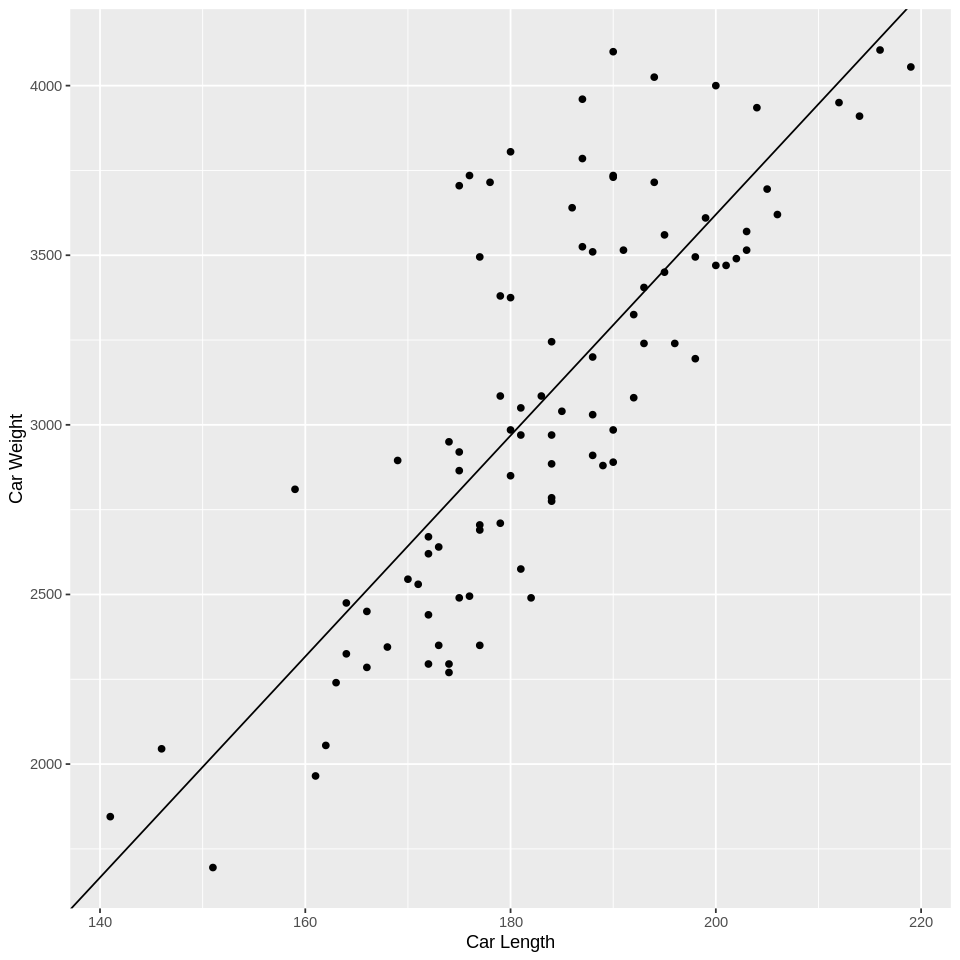

In [ ]:
# help("abline") # Uncomment to see how the function works
# abline(lm.fit)

ggplot(aes(`Length`, `Weight`), data=Cars93) + 
  geom_point() + 
  geom_abline(intercept = coef(lm.fit)[1], slope = coef(lm.fit)[2]) + # adds a line that shows the model's fit
  xlab('Car Length') + ylab('Car Weight') 

If you want a comprehensive visualization of the model, you can apply the base R plot command to the _lm.fit_ model object. 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



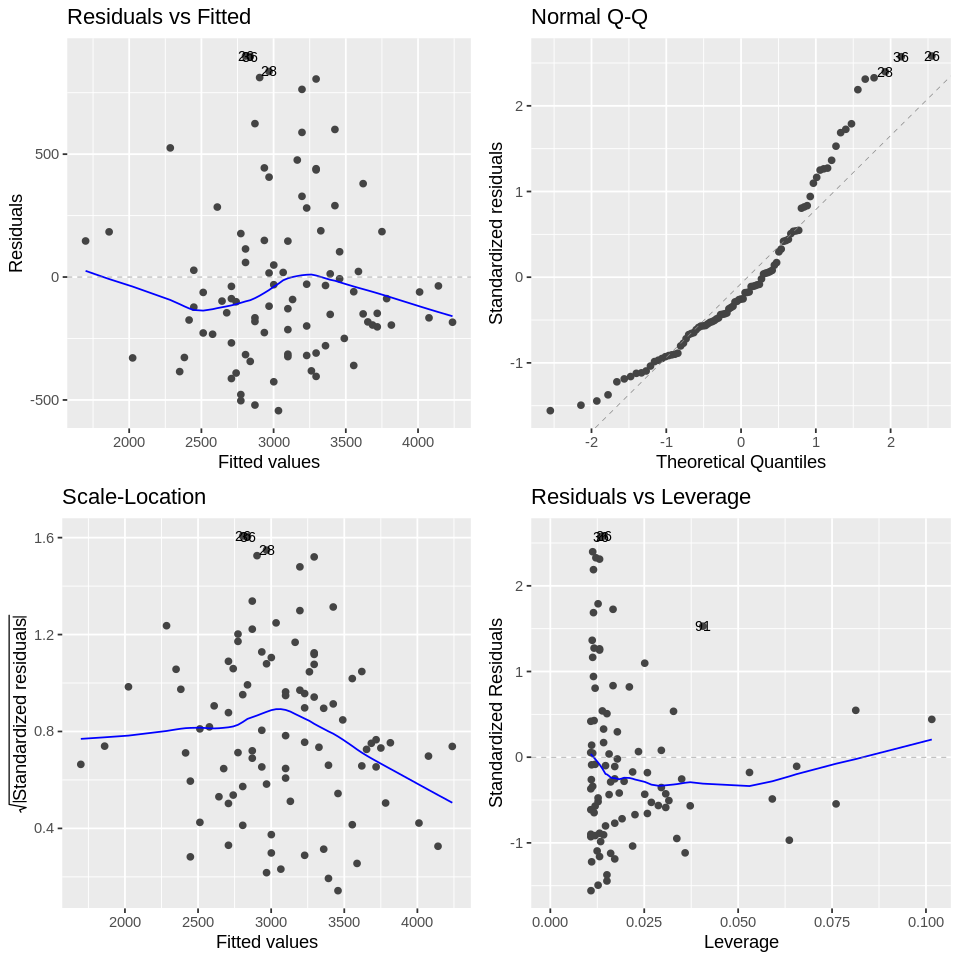

In [ ]:
install.packages("ggfortify")
library(ggfortify) #load a ggplot library that can plot model diagnostics  

suppressWarnings(
  autoplot(lm.fit, label.size = 3)
  )
# ( ^ note: I just suppressed a warning about an old version of a command that ggfortify uses - you don't need to worry about it)

Notice we get four plots that reveal different aspects of the model.

1. **Residuals vs. Fitted values:** We are looking for a generally flat line here, which would indicate a strictly linear data set.

2. **Q-Q Plot:** This is on the residuals and is used to validate your assumption that $Y$ is normally distributed. Note that the residuals are normalized to be standard normal (i.e., z-score transformed).

3. **Scale-location:** This is similar to the first plot, but the residuals are rescaled to be positive. This helps you to see if any non-linearities in the model are driven by tails in the residual distribution.

4. **Residuals vs. Leverage:** Here we apply the leverage statistic to see if there are any high-leverage values that are driving the model fits. Remember, you want to look for clusters of extreme points in the x-dimension here.

If you want to explore these values in more detail, we suggest getting comfortable with the `residuals`, `rstudent`, and `hatvalues` functions.

*Notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, Patience Stevens, and Amy Sentis.*